In [ ]:
# !pip install POT
# !ls plots
# ####Required liberaries (uncomment to install)
# ! pip install seaborn
# ! pip install pandas

# !mkdir plots
from  scipy.optimize import newton
import math
from google.colab import files
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from scipy import signal
import itertools
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib import pyplot as plt
from scipy.special import sici
import pandas as pd
import seaborn as sns
# import ot
# font = {'size'   : 12}

# matplotlib.rc('font', **font)

In [ ]:
# BN without BN
n = 10
d = 1000

eps = 0.000001

T = 70
c = np.zeros((n,n))
repeat = 10


def bn(w,x,d): 
  x = w@x/math.sqrt(d)
  x = x-np.mean(x,axis=1).reshape(d,1).repeat(n,1)
  xnorm = np.linalg.norm(x,axis=1)
  x = ((math.sqrt(n)*x.T)/xnorm).T
  # x = np.maximum(x,0)
  return x

all_results = []
results = []

print(d,"----")
dists = []
dists2 = []
ids = []
### covariance of relu 
c = -1./(n-1)
cstar = (math.sqrt(1-c**2)+c*(math.pi-np.arccos(c)))/math.pi
C = np.eye(n)#0.5*((1-cstar)*np.eye(n) + cstar*np.ones((n,n)))

for k in range(repeat):
  r = np.random.randn(n)
  x = np.zeros((d,n))
  for q in range(d): 
    x[q,:] = r + eps*np.random.randn(n)
  x2 = np.random.randn(d,n)/math.sqrt(d)
  for i in range(T):
    w = np.random.randn(d,d)/math.sqrt(d)
    x = bn(w,x,d)
    x2 = w @ x2

    if i % 3 ==0:   
      dists2.append(np.linalg.norm(x.T@x/d-C))
      dists.append(np.linalg.norm(x2.T@x2-np.eye(n)))
      ids.append(i)
all_results.append(dists)

run_dict={'run_id': ids,'dists':dists,'dists2':dists2}
results.append(pd.DataFrame(run_dict))
results=pd.concat(results)


1000 ----


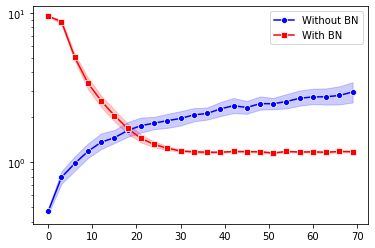

In [ ]:
from ssl import PROTOCOL_TLSv1_2
p1 = sns.lineplot(data=results,x="run_id",y="dists",  marker = 'o', ci=95,color='blue',label='Without BN')
p2 = sns.lineplot(data=results,x="run_id",y="dists2",  marker='s',ci=95,color='red',label='With BN')
# p1.set(xlabel='Layer',fontsize=15)
# plt.rcParams['text.usetex'] = True
p2.set_yscale('log')
p1.set_yscale('log')
p1.set_xlabel('', fontsize=1)
p1.set_ylabel('',fontsize=1)
fig = p2.get_figure()
fig.savefig('depth_norm.pdf',format='pdf')

In [ ]:
files.download('depth_norm.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
n = 10
d = 1000

eps = 0.000001


c = np.zeros((n,n))
repeat = 10


def bn(w,x,d): 
  x = w@x/math.sqrt(d)
  x = x-np.mean(x,axis=1).reshape(d,1).repeat(n,1)
  xnorm = np.linalg.norm(x,axis=1)
  x = ((math.sqrt(n)*x.T)/xnorm).T
  x = np.maximum(x,0)
  return x
ds = [4,8,16,32,64,128,256]
experiments = []
theory = []
results = []
ids = []
for d in ds:
  print(d,"----")
  
  ### covariance of relu 
  c = -1./(n-1)
  cstar = (math.sqrt(1-c**2)+c*(math.pi-np.arccos(c)))/math.pi
  C = 0.5*((1-cstar)*np.eye(n) + cstar*np.ones((n,n)))
  
  for k in range(repeat):
    r = np.random.randn(n)
    x = np.zeros((d,n))
    for q in range(d): 
      x[q,:] = r + eps*np.random.randn(n)
    x2 = np.random.randn(d,n)
    avg_dist = 0 
    num_dist = 0 
    T = 600
    for i in range(T):
      w = np.random.randn(d,d)/math.sqrt(d)
      x = bn(w,x,d)
      
  
      if i > 40:
        avg_dist =+ np.linalg.norm(x.T@x/d-C)
        num_dist =+ 1
        # print(k,i, np.linalg.norm(x.T@x/d-x2.T@x2/d,ord=2))
        # dists.append()
    ids.append(d)
    experiments.append(avg_dist/float(num_dist))
    theory.append(2*n/math.sqrt(d))



4 ----
8 ----
16 ----
32 ----
64 ----
128 ----
256 ----


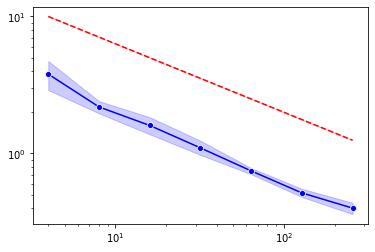

In [ ]:
results = []
run_dict={'run_id': ids,'experiments':experiments, 'theory':theory}
results.append(pd.DataFrame(run_dict))
results=pd.concat(results)
from ssl import PROTOCOL_TLSv1_2
p1 = sns.lineplot(data=results,x="run_id",y="experiments",  marker = 'o', ci=95,color='blue')
p2 = sns.lineplot(data=results,x="run_id",y="theory", linestyle='--',ci=95,color='red')
# p1.set(xlabel='Layer',fontsize=15)
p1.set_xscale('log')
p1.set_yscale('log')
p1.set_xlabel('', fontsize=12)
p1.set_ylabel('',fontsize=12)
fig = p2.get_figure()
fig.savefig('depth_norm.pdf',format='pdf')

In [ ]:
files.download('depth_norm.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
n = 10
d = 1000

x = np.zeros((d,n))
eps = 0.000001

x1 = np.random.randn(100000,n)
x1norm = np.linalg.norm(x1,axis=1)
x1 = ((math.sqrt(n)*x1.T)/x1norm).T
Beta = np.mean(np.tanh(x1[:,0])**2)
Beta1 = np.mean(np.sin(x1[:,0])**2)
T = 100
c = np.zeros((n,n))
repeat = 10
convs = np.zeros((10,repeat))
results = []
ids = []
dists = []
dists2 = []
### covariance of relu

for k in range(repeat):
  r = np.random.randn(n)
  for i in range(d): 
   x[i,:] = r + eps*np.random.randn(n)
  x2 = x.copy()
  for i in range(T):
    w = np.random.randn(d,d)/math.sqrt(d)
    xnorm = np.linalg.norm(x,axis=1)
    x = ((math.sqrt(n)*x.T)/xnorm).T
    x = np.tanh(x)
    x = w@x/math.sqrt(d)

    x2norm = np.linalg.norm(x2,axis=1)
    x2 = ((math.sqrt(n)*x2.T)/x2norm).T
    x2 = np.sin(x2)
    x2 = w@x2/math.sqrt(d)

    c = c + x.T@x/T
    if i % 10 ==0:
      convs[int(i/10),k] = np.linalg.norm(x.T@x-Beta*np.eye(n))
      print(k,i, np.linalg.norm(x.T@x-Beta*np.eye(n),ord=2))
      dists.append(np.linalg.norm(x.T@x-Beta*np.eye(n),ord=2))
      dists2.append(np.linalg.norm(x2.T@x2-Beta1*np.eye(n),ord=2))
      ids.append(i)

run_dict={'run_id': ids,'dists':np.log(dists),'dists2':np.log(dists2)}
results.append(pd.DataFrame(run_dict))
results=pd.concat(results)


0 0 2.5517675088965563
0 10 1.6444079027324527
0 20 0.6685879412645241
0 30 0.14120283078952042
0 40 0.1389500148807087
0 50 0.17455330796578428
0 60 0.15278895325719782
0 70 0.16008092327892612
0 80 0.2141489722466586
0 90 0.14054752468726886
1 0 3.6605545986692936
1 10 2.115321643890389
1 20 0.8112025032909448
1 30 0.2390186299280166
1 40 0.18055794796853186
1 50 0.17930306512355648
1 60 0.1522589297729722
1 70 0.14199291388927143
1 80 0.15707960942715826
1 90 0.1306723044853071
2 0 3.398155757782797
2 10 1.7874728723019748
2 20 0.6538670606848977
2 30 0.21164648389429191
2 40 0.1554581907715872
2 50 0.14771175651597726
2 60 0.13682391391943272
2 70 0.12792005332492346
2 80 0.1446211849887165
2 90 0.15574229057040712
3 0 3.3537613744038226
3 10 1.8758074283094417
3 20 0.8267817800882417
3 30 0.3761048782105268
3 40 0.18299916694120247
3 50 0.17113454946692974
3 60 0.12296350757905174
3 70 0.11593020226585977
3 80 0.1632275150380966
3 90 0.13933092316191661
4 0 4.213021016675296
4 10 

In [ ]:
# contracting grams 
n = 10
d = 1000

eps = 0.000001

T = 70
c = np.zeros((n,n))
repeat = 10


def bn(w,x,d): 
  x = w@x/math.sqrt(d)
  x = x-np.mean(x,axis=1).reshape(d,1).repeat(n,1)
  xnorm = np.linalg.norm(x,axis=1)
  x = ((math.sqrt(n)*x.T)/xnorm).T
  x = np.maximum(x,0)
  return x
ds = [100,1000]
all_results = []
results = []
for d in ds:
  print(d,"----")
  dists = []
  ids = []
  for k in range(repeat):
    r = np.random.randn(n)
    x = np.zeros((d,n))
    for q in range(d): 
      x[q,:] = r + eps*np.random.randn(n)
    x2 = np.random.randn(d,n)
    for i in range(T):
      w = np.random.randn(d,d)/math.sqrt(d)
      x = bn(w,x,d)
      x2 = bn(w,x2,d)
  
      if i % 3 ==0:
        
        # print(k,i, np.linalg.norm(x.T@x/d-x2.T@x2/d,ord=2))
        dists.append(np.linalg.norm(x.T@x/d-x2.T@x2/d,ord=2))
        ids.append(i)
  all_results.append(dists)

run_dict={'run_id': ids,'dists':np.log(all_results[0]),'dists2':np.log(all_results[1])}
results.append(pd.DataFrame(run_dict))
results=pd.concat(results)


100 ----
1000 ----


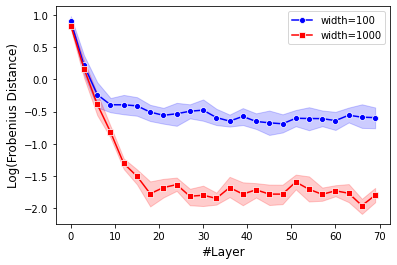

In [ ]:
from ssl import PROTOCOL_TLSv1_2
p1 = sns.lineplot(data=results,x="run_id",y="dists",  marker = 'o', ci=95,color='blue',label='width=100')
p2 = sns.lineplot(data=results,x="run_id",y="dists2",  marker='s',ci=95,color='red',label='width=1000')
# p1.set(xlabel='Layer',fontsize=15)
p1.set_xlabel('#Layer', fontsize=12)
p1.set_ylabel('Log(Frobenius Distance)',fontsize=12)
fig = p2.get_figure()
fig.savefig('depth_norm.pdf',format='pdf')

In [ ]:
files.download('depth_norm.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
n = 10
ds = [50,400,800,1200,1600,2000]


eps = 0.000001

x1 = np.random.randn(100000,n)
x1norm = np.linalg.norm(x1,axis=1)
x1 = ((math.sqrt(n)*x1.T)/x1norm).T
Beta = np.mean(np.sin(x1[:,0])**2)


repeat = 2
convs = np.zeros((10,repeat))
results = []
ids = []
dists = []
dists2 = []
dists3 = []
for k in range(repeat):
  print(k)
  for d in ds:
    avgerror = 0
    avgerror2 = 0
    x = np.zeros((d,n))
    r = np.random.randn(n)
    for i in range(d): 
      x[i,:] = r + eps*np.random.randn(n)
    x2 = x.copy()
    T = 100
    for i in range(T):
      w = np.random.randn(d,d)/math.sqrt(d)
      xnorm = np.linalg.norm(x,axis=1)
      x = ((math.sqrt(n)*x.T)/xnorm).T
      x = np.tanh(x)
      x = w@x/math.sqrt(d)

      x2norm = np.linalg.norm(x2,axis=1)
      x2 = ((math.sqrt(n)*x2.T)/x2norm).T
      x2 = np.sin(x2)
      x2 = w@x2/math.sqrt(d)
    dists.append(np.log(np.linalg.norm(x.T@x-Beta*np.eye(n),ord = 2)))
    dists2.append(np.log(np.linalg.norm(x2.T@x2-Beta1*np.eye(n),ord =2)/(T-49)))
    dists3.append(np.log(n**(1.5)/np.sqrt(d)))
    ids.append(np.log(d))

run_dict={'run_id': ids,'dists':dists,'dists2':dists2,'dists3':dists3}
results.append(pd.DataFrame(run_dict))
results=pd.concat(results)


0
1


In [ ]:
dists2

[-3.881100418981015,
 -4.8604127880254655,
 -5.5337839313751775,
 -5.614624828990853,
 -6.051075135214181,
 -6.243816106218588,
 -3.580518794421464,
 -5.336100665859407,
 -5.7398532979061,
 -5.902176717098442,
 -6.038259509178587,
 -6.305405424700367]

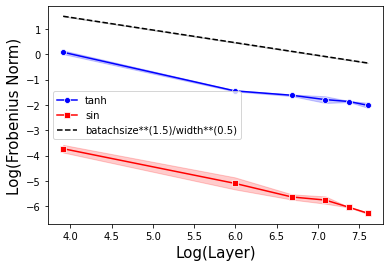

In [ ]:
# from ssl import PROTOCOL_TLSv1_2
# run_dict["dists3"] = 10+np.asarray(run_dict["dists3"])
p1 = sns.lineplot(data=results,x="run_id",y="dists",  marker = 'o', ci=95,color='blue',label='tanh')
p2 = sns.lineplot(data=results,x="run_id",y="dists2",  marker='s',ci=95,color='red',label='sin')
p3 = sns.lineplot(data=results,x="run_id",y="dists3", ci=95,color='black',label='batachsize**(1.5)/width**(0.5)',linestyle='--')
# p1.set(xlabel='Layer',fontsize=15)
# p1.set(xlabel='Layer',fontsize=15)
p1.set_xlabel('Log(Layer)', fontsize=15)
p1.set_ylabel('Log(Frobenius Norm)',fontsize=15)
fig = p3.get_figure()
fig.savefig('width_norm.pdf',format='pdf')

In [ ]:
files.download('width_norm.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>